# Data Discription
This data set was choosen because it broke down the State, and positive/negitive test results of covid 19 tests within each state. This data set is a continuous record throughout the entire covid 19 pandemic, with running totals in each tally for each week of 2020. 
For the purposes of this project we are only utilizing the first 55 rows. These 55 rows represent each of the 50 states, plus all United States territories. This would satisfy the most recent covid 19 data.

In [38]:
# Setting up dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reading in the data source
covid_state_data = pd.read_csv("data_resources/Covid_Data.csv")
covid_state_data

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200806,AK,4223.0,257349.0,NaN,42.0,NaN,NaN,NaN,2.0,...,261572,0,0,cb6042a57c94293675b4f8b2a02af69d8012d91f,0,0,0,0,0,NaN
1,20200806,AL,96592.0,643192.0,NaN,1575.0,11313.0,NaN,1211.0,NaN,...,739784,19,213,27774ad0a8fd9899b54fb5d577b1b778d3d5004f,0,0,0,0,0,NaN
2,20200806,AR,47028.0,492808.0,NaN,514.0,3118.0,NaN,NaN,111.0,...,539836,7,0,1188e9bb4b25b98410580729c252181b8d1f4dfc,0,0,0,0,0,NaN
3,20200806,AS,0.0,1396.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1396,0,0,5c33616b07ca7687fdea8c9ea6a110cb6abea724,0,0,0,0,0,NaN
4,20200806,AZ,183647.0,812217.0,NaN,1879.0,14068.0,593.0,NaN,427.0,...,995864,70,509,b9e494d4ce7ec7f1188ac5a7b72643b596000d1d,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8636,20200126,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,0,0,7acb526e14f20a29cc74a0b32a37328bc6eac6c2,0,0,0,0,0,NaN
8637,20200125,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,0,0,9b52ca94dd2a996822542ea5f17a7363e7ad91cf,0,0,0,0,0,NaN
8638,20200124,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,0,0,094154f68e74bfc30b977cdee888f9c07be4360e,0,0,0,0,0,NaN
8639,20200123,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,0,0,e16af2a6a8f060355ff5ba499a28309a262c0b1e,0,0,0,0,0,NaN


# Cleaning
The method used to clean the data was to first fill all NaN values to 0. Next we isolated the most recent data on the data set, as this data set gave a running total. Finally, we found the percentage of positive test results per state and placed the total tests and percentage positive columns into the dataframe.

In [39]:
# Dropping the NaN values within the Data set and replacing them with 0
covid_state_data_0 = covid_state_data.fillna(0)

# the format of the date is yearmmdd within the data set
iso_state_covid_data_date = covid_state_data_0.loc[covid_state_data_0["date"] == 20200806]

# Making a copy of the most recent timestamp.
clean_state_covid_data = iso_state_covid_data_date.copy()

# Gathering the State, Positive, Negative, and Pending columns from the most recent timestamp
clean_state_covid_data = clean_state_covid_data[["state", "positive", "negative","pending"]]

# Getting the sum of the positive, negitive, and pending test results, and appending this into a new column "total tests"
clean_state_covid_data["total tests"]= clean_state_covid_data["positive"] + clean_state_covid_data["negative"] + clean_state_covid_data["pending"]
# Dividing the positive test results per state with total tests per state, and appending this into a new column "Percent Positive"
clean_state_covid_data["percentage positive"] = clean_state_covid_data["positive"]/clean_state_covid_data["total tests"]*100

# Showing DataFrame with calculations for each state
clean_state_covid_data

,state,positive,negative,pending,total tests,percentage positive
0,AK,4223.0,257349.0,0.0,261572.0,1.614469
1,AL,96592.0,643192.0,0.0,739784.0,13.056784
2,AR,47028.0,492808.0,0.0,539836.0,8.711535
3,AS,0.0,1396.0,0.0,1396.0,0.000000
4,AZ,183647.0,812217.0,0.0,995864.0,18.440972
5,CA,529980.0,7970483.0,0.0,8500463.0,6.234719
6,CO,48988.0,516331.0,0.0,565319.0,8.665550
7,CT,50245.0,806853.0,0.0,857098.0,5.862223
8,DC,12518.0,193465.0,0.0,205983.0,6.077201
9,DE,15365.0,177338.0,0.0,192703.0,7.973410


# Visualization
In order to represent all the states for a most recent date (8/6/2020) we created a bar chart. In the bar chart our dependent variables are the 50 US States and US Territories. Our independent variables are the percentage of tests results that were positive for each state and territory. 

Additional visualization to be considered would be to group states by region, to see an expanded regional look of the perecentage of positive covid-19 test results.  

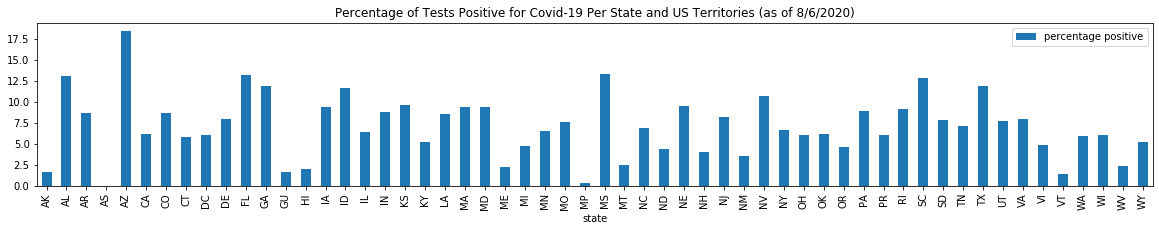

<Figure size 432x288 with 0 Axes>

In [41]:
# Gathering the dependent and independent variables.
state_and_percent_positive = clean_state_covid_data[["state","percentage positive"]]

# Set the index to be "State" so they will be used as labels
state_and_percent_positive = state_and_percent_positive.set_index("state")
state_and_percent_positive.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Percentage of Tests Positive for Covid-19 Per State and US Territories (as of 8/6/2020)")

# Show Bar Chart
plt.show()
plt.tight_layout()

# Analysis
As of 8/6/2020 the primary location for the highest percentages of tests positive are southern states. Arizona, Alabama, Mississippi, Florida, Georga, South Carolina, and Texas. These states were also some of the first to reopen after the initial state wide lockdown's. 

Further questions to be considered are how reopening methodology impacts positive covid-19 tests per state. It is important to note that southern states were some of the first states to reopen their economies. Here is a link to an article by the New York Times to help us begin to further expand on these further questions. https://www.nytimes.com/interactive/2020/us/states-reopen-map-coronavirus.html

# Sourcing
## Data References

(David, Suzie) mental_health - https://www.cdc.gov/nchs/covid19/pulse/mental-health.htm,
(Cythia, Jen) covid_underscore_death.csv- https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Sex-Age-and-S/9bhg-hcku/data,
(Jen, Kent) State_Covid_Data - https://covidtracking.com